## <font color=orange>Plotting Slab Flux Results and Subduction Parameters</font>

#### <font color=blue>Notebook 3</font>

In this notebook we plot previously generated slab flux results and calculate + plot the temporal variation in various subduction parameters.

This is the third in a series of notebooks displaying examples of the data presened in the following manuscript:

*'Subduction history reveals Cretaceous slab superflux as a possible cause for the mid-Cretaceous plume pulse and superswell events'* by Madison East, R Dietmar Müller, Simon Williams, Sabin Zahirovic and Christian Heine

(Notebook written by Madison East - 2018)

#### Reference:
East, M., Müller, R. D., Williams, S., Zahirovic, S. and Heine, C., Subduction history reveals Cretaceous slab superflux as a possible cause for the mid-Cretaceous plume pulse and superswell events, Gondwana Research, in review.

In [12]:
#import pygplates
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import gridspec
#from mpl_toolkits.basemap import Basemap
#from topology_plotting import *
from matplotlib.patches import Polygon
#from scipy.special import erfinv
import pandas as pd
import math
import statistics
import scipy.ndimage
import matplotlib as mpl

%matplotlib inline

### Slab flux

First we will plot the previously generated slab flux results. This plot can easily be altered to plot subducting plate area.

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


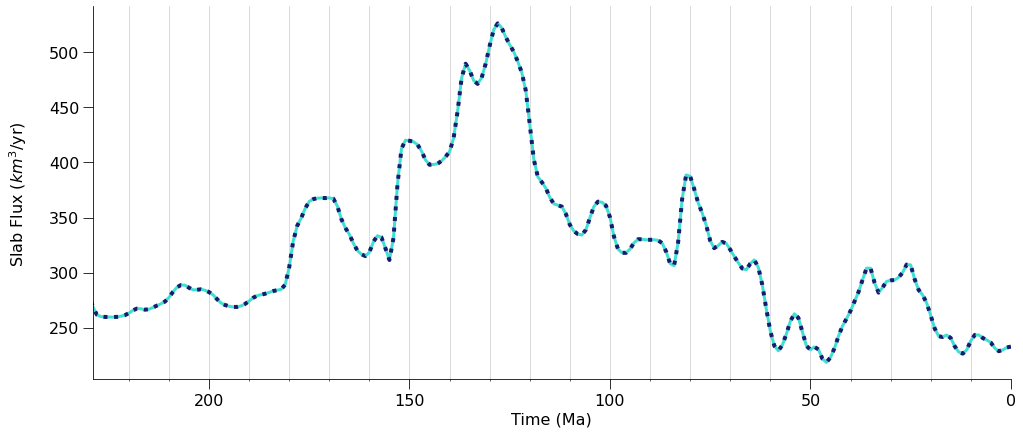

In [13]:
# Load in the saved slab flux results generated in the previous notebook
results_volume = pd.read_csv('/tmp/Subduction_Volume_Flux_Summed_Data_clean_km3y_0_230Ma.csv')

mpl.rcParams['font.family'] = 'Arial' ## Arial, 
mpl.rcParams['xtick.major.size'] = '10'
mpl.rcParams['ytick.major.size'] = '10'

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111)

# Here we plot the data, with two lines plotted just for a fun visual effect
# note that a filter is applied to the data
ax.plot(results_volume['Time_(Ma)'],scipy.ndimage.gaussian_filter1d(results_volume['Subduction_Volume_Flux_(km^3/year)'],1),'turquoise',label='Slab Flux clean',linewidth=3,linestyle='-')
ax.plot(results_volume['Time_(Ma)'],scipy.ndimage.gaussian_filter1d(results_volume['Subduction_Volume_Flux_(km^3/year)'],1),'midnightblue',label='Slab Flux clean',linewidth=4,linestyle=':')

ax.set_xlabel("Time (Ma)")
ax.set_ylabel("Slab Flux ($km^3$/yr)", color='k')


ax.yaxis.labelpad=20

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.yaxis.set_ticks_position('left')

ax.xaxis.set_ticks_position('bottom')

major_ticks = np.arange(0, 231, 50)                                              
minor_ticks = np.arange(0, 231, 10)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_axisbelow(True)
ax.xaxis.grid(which= 'both', color='lightgray', linestyle='solid')
#ax.yaxis.grid( color='lightgray', linestyle='solid')

#plt.legend(loc=1,fontsize='12')
plt.tight_layout()

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.xlim(229,0)

#plt.savefig('Output_figures/Slab_flux_km3y_filtered_AREPS_clean.png', dpi=200, bbox_inches='tight')

plt.show()
plt.close()

### Comparing slab flux, subducting plate area and total subduction zone length

This plot allows us to examine what can reasonably be used as a proxy for what. We will see that it is not valid to use global subduction zone lengths alone as a proxy for slab flux or subducting plate area.  

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


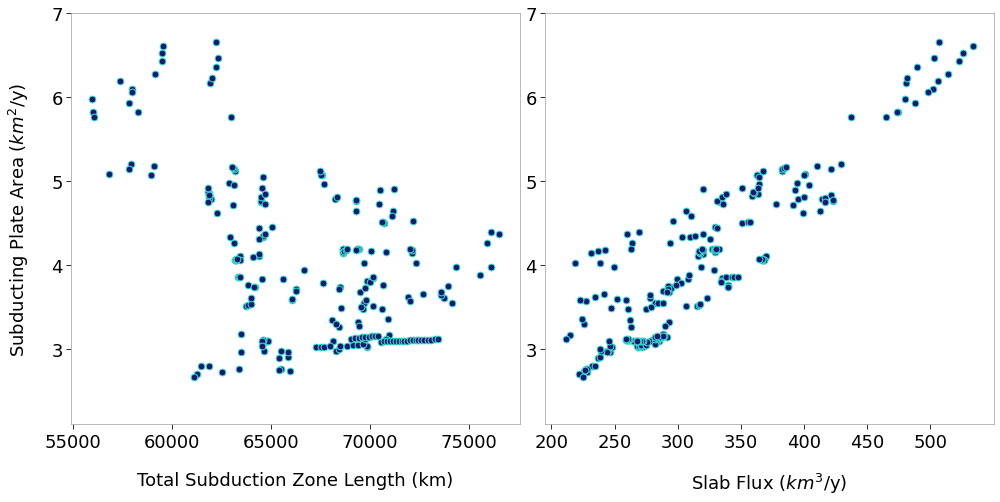

In [14]:
## Scatter Plots comparing length area and volume
## total length calculated here using a sum function and also converted to km's

#loading in the previously calculated data
import zipfile
#SubAreasTable = pd.read_csv('SubductionVolumesAreaTable_clean_0_230Ma.csv') # despite the name of the variable this is the master table with all the data
zf = zipfile.ZipFile('Data/SubductionVolumesAreaTable_clean_0_230Ma.csv.zip') 
SubAreasTable = pd.read_csv(zf.open('SubductionVolumesAreaTable_clean_0_230Ma.csv'))
results_area = pd.read_csv('/tmp/Subduction_Area_Flux_Summed_Data_clean_km2y_0_230Ma.csv')

########## Here we area summing arc length values for each Ma and coverting from m to km

times = np.arange(0,231,1)
total_subduction_length_km = []
for time in times:
    subset1 = SubAreasTable[(SubAreasTable['time']==time)]
    total_subduction_length_km.append(math.fsum(subset1.arc_length_m)/1000)
    
######### Now we start plotting    

mpl.rcParams['font.family'] = 'Arial' ## Arial, 
mpl.rcParams['xtick.major.size'] = '5'
mpl.rcParams['ytick.major.size'] = '5'

fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(121)

ax.scatter(total_subduction_length_km, results_area['Subduction_Area_Flux_(km^2/year)'],s=46, edgecolor='turquoise', c='midnightblue', alpha=1)

ax.set_ylabel('Subducting Plate Area ($km^2$/y)')
ax.set_xlabel('Total Subduction Zone Length (km)', color='k')

ax.yaxis.labelpad=20
ax.xaxis.labelpad=20

#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)

ax.spines['left'].set_color('darkgrey')
ax.spines['bottom'].set_color('darkgrey')
ax.spines['right'].set_color('darkgrey')
ax.spines['top'].set_color('darkgrey')

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


plt.ylim(2.1,7)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)

ax = fig.add_subplot(122)
ax.scatter(results_volume['Subduction_Volume_Flux_(km^3/year)'], results_area['Subduction_Area_Flux_(km^2/year)'],s=46, edgecolor='turquoise', c='midnightblue', alpha=1)
#ax.set_ylabel('Subducting Plate Area ($km^2$/y)')
ax.set_xlabel('Slab Flux ($km^3$/y)', color='k')

ax.yaxis.labelpad=20
ax.xaxis.labelpad=20

ax.spines['left'].set_color('darkgrey')
ax.spines['bottom'].set_color('darkgrey')
ax.spines['right'].set_color('darkgrey')
ax.spines['top'].set_color('darkgrey')

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.ylim(2.1,7)

plt.tight_layout()

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)

#plt.savefig('Output_figures/Scatter_plots_length_area_volume_AREPS_clean.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close()

### Subduction parameters

Let's have a look at the various subduction parameters that go into calculating slab flux. Again we will need to combine the data from our numerous subduction segments at each time step, summing some parameters and averaging others where appropriate. Note that we have already calculated the total subduction zone lenght in the previous cell. 

Below we calculate three more variables and their standard devations:

In [15]:
# to calculate mean orth conv rate in cm/yr

times = np.arange(0,231,1)
mean_orth_conv_rate_cmyr = []
#pop_standard_dev = []
upper_standard_dev = []
lower_standard_dev = []
for time in times:
    subset1 = SubAreasTable[(SubAreasTable['time']==time)]
    mean_orth_conv_rate_cmyr.append(statistics.mean(subset1.ortho_conv_rate))
    #pop_standard_dev.append(statistics.pstdev(subset1.ortho_conv_rate))
    upper_standard_dev.append((statistics.mean(subset1.ortho_conv_rate))+(statistics.pstdev(subset1.ortho_conv_rate)))
    lower_standard_dev.append((statistics.mean(subset1.ortho_conv_rate))-(statistics.pstdev(subset1.ortho_conv_rate)))

# Calculating mean seafloor age in Myr

times = np.arange(0,231,1)
mean_seafloor_age_Ma = []
sf_upper_standard_dev = []
sf_lower_standard_dev = []
for time in times:
    subset1 = SubAreasTable[(SubAreasTable['time']==time)]
    mean_seafloor_age_Ma.append(statistics.mean(subset1.SeafloorAge))
    sf_upper_standard_dev.append((statistics.mean(subset1.SeafloorAge))+(statistics.pstdev(subset1.SeafloorAge)))
    sf_lower_standard_dev.append((statistics.mean(subset1.SeafloorAge))-(statistics.pstdev(subset1.SeafloorAge)))
    
# Calculating mean lithospheric thickness in km

times = np.arange(0,231,1)
mean_thickness_km = []
thick_upper_standard_dev = []
thick_lower_standard_dev = []
for time in times:
    subset1 = SubAreasTable[(SubAreasTable['time']==time)]
    mean_thickness_km.append((statistics.mean(subset1.lithosphere_thickness_plate_model))/1000)
    thick_upper_standard_dev.append(((statistics.mean(subset1.lithosphere_thickness_plate_model))+(statistics.pstdev(subset1.lithosphere_thickness_plate_model)))/1000)
    thick_lower_standard_dev.append(((statistics.mean(subset1.lithosphere_thickness_plate_model))-(statistics.pstdev(subset1.lithosphere_thickness_plate_model)))/1000)

### Now we plot:

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


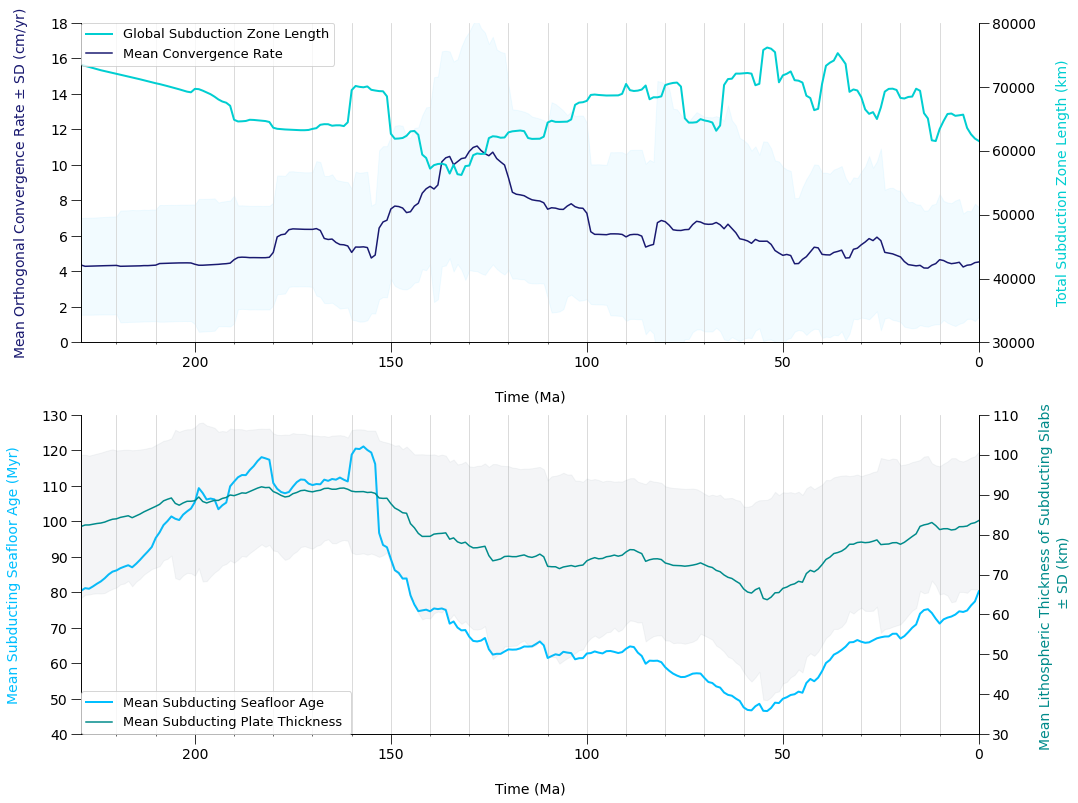

In [16]:
mpl.rcParams['font.family'] = 'Arial' 
mpl.rcParams['xtick.major.size'] = '10'
mpl.rcParams['ytick.major.size'] = '10'

fig1 = plt.figure(figsize=(15,11))
ax1 = fig1.add_subplot(211)
ax2 = ax1.twinx()

line_up, = ax2.plot(results_volume['Time_(Ma)'],scipy.ndimage.gaussian_filter1d(total_subduction_length_km,0.5),'darkturquoise', linestyle='-',label='Global Subduction Zone Length',linewidth=2)
line_down, = ax1.plot(results_volume['Time_(Ma)'],scipy.ndimage.gaussian_filter1d(mean_orth_conv_rate_cmyr,0.5),'midnightblue', linestyle='-',label='Convergence Rate',linewidth=1.5)
ax1.fill_between(results_volume['Time_(Ma)'], upper_standard_dev, lower_standard_dev, facecolor='deepskyblue', alpha=0.05, edgecolor='deepskyblue')

ax1.set_xlabel("Time (Ma)")
ax1.set_ylabel("Mean Orthogonal Convergence Rate $\pm$ SD (cm/yr)", color='midnightblue')
ax2.set_ylabel("Total Subduction Zone Length (km)", color='darkturquoise')

ax1.yaxis.labelpad=20
ax2.yaxis.labelpad=20
ax1.xaxis.labelpad=20

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')

major_ticks = np.arange(0, 231, 50)                                              
minor_ticks = np.arange(0, 231, 10)
ax1.set_xticks(major_ticks)
ax1.set_xticks(minor_ticks, minor=True)
ax.set_axisbelow(True)
ax1.xaxis.grid(which= 'both', color='lightgray', linestyle='solid')

#plt.legend(loc=1,fontsize='12')
plt.legend([line_up, line_down], ['Global Subduction Zone Length', 'Mean Convergence Rate '], fontsize=13, loc=2
, borderaxespad=0.)
plt.tight_layout()

for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
             ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(14)
for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
             ax2.get_xticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(14)

plt.xlim(229,0)
ax1.set_ylim(0.,18.)
ax2.set_ylim(30000,80000)

########

ax1 = fig1.add_subplot(212)
ax2 = ax1.twinx()

line_up, = ax1.plot(results_volume['Time_(Ma)'],scipy.ndimage.gaussian_filter1d(mean_seafloor_age_Ma,0.5),'deepskyblue', linestyle='-',label='Seafloor Age',linewidth=2)
line_down, = ax2.plot(results_volume['Time_(Ma)'],scipy.ndimage.gaussian_filter1d(mean_thickness_km,0.5),'darkcyan', linestyle='-',label='Lithospheric Thickness',linewidth=1.5)
#ax1.fill_between(results_volume['Time_(Ma)'], sf_upper_standard_dev, sf_lower_standard_dev, facecolor='deepskyblue', alpha=0.05, edgecolor='deepskyblue')
ax2.fill_between(results_volume['Time_(Ma)'], thick_upper_standard_dev, thick_lower_standard_dev, facecolor='lightslategrey', alpha=0.08, edgecolor='lightslategrey')

ax1.set_xlabel("Time (Ma)")
ax1.set_ylabel("Mean Subducting Seafloor Age (Myr)", color='deepskyblue')
ax2.set_ylabel("Mean Lithospheric Thickness of Subducting Slabs \n $\pm$ SD (km)", color='darkcyan')

ax1.yaxis.labelpad=20
ax2.yaxis.labelpad=20
ax1.xaxis.labelpad=20

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')

major_ticks = np.arange(0, 231, 50)                                              
minor_ticks = np.arange(0, 231, 10)
ax1.set_xticks(major_ticks)
ax1.set_xticks(minor_ticks, minor=True)
ax.set_axisbelow(True)
ax1.xaxis.grid(which= 'both', color='lightgray', linestyle='solid')

#plt.legend(loc=1,fontsize='12')
plt.legend([line_up, line_down], ['Mean Subducting Seafloor Age', 'Mean Subducting Plate Thickness '], fontsize=13, loc=3
, borderaxespad=0.)
plt.tight_layout()

for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
             ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(14)
for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
             ax2.get_xticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(14)

plt.xlim(229,0)
ax1.set_ylim(40,130)
ax2.set_ylim(30,110)
#ax1.set_ylim(0.,20.)


#######
#plt.ylim(0,20)
#plt.savefig('Output_figures/Subduction_parameters_figure.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close()

#### Almost done...

As the final thing, below you are given the option of saving the variables we calculated in this notebook.  

In [17]:
## Saving total sub zone length data:
times = np.arange(0,231,1)
data = pd.DataFrame()
data['Time_Ma'] = pd.Series(times)
data['Total_Subduction_Zone_Length_km'] = pd.Series(total_subduction_length_km)
data.to_csv('/tmp/Total_subduction_zone_length_AREPS_clean_km_0_230Ma.csv')

In [18]:
## Saving mean orthogonal convergence rate data:
times = np.arange(0,231,1)
data = pd.DataFrame()
data['Time_Ma'] = pd.Series(times)
data['Mean_orthogonal_convergence_rate_cm/yr'] = pd.Series(mean_orth_conv_rate_cmyr)
data.to_csv('/tmp/Mean_orthogonal_convergence_rate_AREPS_clean_cmyr_0_230Ma.csv')

In [19]:
## Saving mean seafloor age data:
times = np.arange(0,231,1)
data = pd.DataFrame()
data['Time_Ma'] = pd.Series(times)
data['Mean_subducting_seafloor_age_myr'] = pd.Series(mean_seafloor_age_Ma)
data.to_csv('/tmp/Mean_subducting_seafloor_age_AREPS_clean_myr_0_230Ma.csv')

In [20]:
## Saving mean lithospheric thickness of subducting slabs data:
times = np.arange(0,231,1)
data = pd.DataFrame()
data['Time_Ma'] = pd.Series(times)
data['Mean_lithospheric_thickness_km'] = pd.Series(mean_thickness_km)
data.to_csv('/tmp/Mean_lithospheric_thickness_AREPS_clean_km_0_230Ma.csv')

In [21]:
print('done')

done
